# Лабораторная работа №7

Выполнила: Иванова Елизавета Дмитриевна, НПМмд-01-23

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10, mnist

tf.random.set_seed(1)

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 238s 1us/step


In [3]:
# Первый блок из последовательных слоев
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

In [4]:
#  выход связываем со следующим блоком:
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

In [5]:
# формируем суммарный сигнал с выходов x и block_1_output:
block_2_output = layers.add([x, block_1_output])

In [6]:
#  суммарный выход block_2_output подаем на вход следующего
# формируем суммарный слой для выходов x и block_2_output:
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

In [7]:
# суммарный тензор block_3_output подаем на последний блок
# и формируем на выходе классы изображений:
x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

In [8]:
model = keras.Model(inputs, outputs, name="toy_resnet")

In [9]:
# стандартные операции для инициализации модели,
# обучения и проверки качества работы сети на тестовой выборке:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

print( model.evaluate(x_test, y_test) )

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 97ms/step - accuracy: 0.2306 - loss: 1.9660 - val_accuracy: 0.4561 - val_loss: 1.4567
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 97ms/step - accuracy: 0.4820 - loss: 1.3866 - val_accuracy: 0.5906 - val_loss: 1.1605
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.5822 - loss: 1.1536 - val_accuracy: 0.6359 - val_loss: 1.0084
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.6386 - loss: 1.0151 - val_accuracy: 0.6729 - val_loss: 0.9097
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.6734 - loss: 0.9111 - val_accuracy: 0.6848 - val_loss: 0.8846
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7066 - loss: 0.8246 - val_accuracy: 0.7145 - val_loss: 0.7945
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7368 - loss: 0.7518 - val_accuracy: 0.7264 - val_loss: 0.7913
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7555 - loss: 0.6957 - 

# Задание

1) Самостоятельно попробовать улучшить эти результаты, меняя модель сети, увеличивая ее глубину.

In [82]:
inputs = keras.Input(shape=(32, 32, 3), name="img")

x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.BatchNormalization()(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
block_3_output = layers.add([x, layers.Conv2D(64, 1, padding="same")(block_2_output)])

x = layers.Conv2D(128, 3, activation="relu", padding="same")(block_3_output)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
block_4_output = layers.add([x, layers.Conv2D(128, 1, padding="same")(block_3_output)])

x = layers.Conv2D(256, 3, activation="relu", padding="same")(block_4_output)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
block_5_output = layers.add([x, layers.Conv2D(256, 1, padding="same")(block_4_output)])

x = layers.GlobalAveragePooling2D()(x)
dense_output = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(dense_output)
outputs = layers.Dense(10, activation='softmax')(dense_output)

In [83]:
model = keras.Model(inputs, outputs, name="deep_toy_resnet")

In [84]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 305ms/step - accuracy: 0.4448 - loss: 1.5153 - val_accuracy: 0.4987 - val_loss: 1.4745
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 304ms/step - accuracy: 0.6734 - loss: 0.9298 - val_accuracy: 0.6588 - val_loss: 0.9928
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 308ms/step - accuracy: 0.7388 - loss: 0.7391 - val_accuracy: 0.6932 - val_loss: 0.9659
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - accuracy: 0.7865 - loss: 0.6101 - val_accuracy: 0.5772 - val_loss: 1.8395
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 280ms/step - accuracy: 0.8199 - loss: 0.5204 - val_accuracy: 0.7214 - val_loss: 0.9023
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - accuracy: 0.8470 - loss: 0.4432 - val_accuracy: 0.6578 - val_loss: 1.3320
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 313ms/step - accuracy: 0.8679 - loss: 0.3757 - val_accuracy: 0.6920 - val_loss: 1.0950
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 318ms/step - accuracy: 0.8914 -

In [90]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8052 - loss: 1.2290
[1.2370418310165405, 0.8048999905586243]


2) Получить результат прохождения какого-либо изображения через всю сеть, определить тип этого результата и что он означает

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step
7


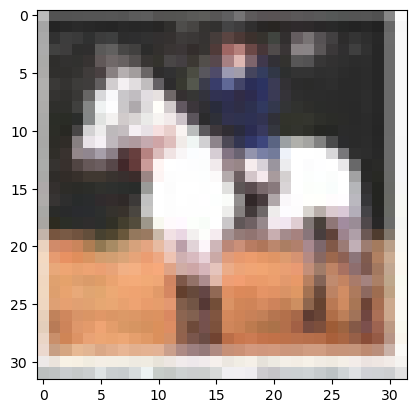

In [98]:
print(model.predict(x_test)[8793].argmax())
plt.imshow(x_test[8793])

In [108]:
def predicton(image_path):
    img = Image.open(image_path).resize((32, 32))
    img_array = np.array(img) / 255.0
    if img_array.shape != (32, 32, 3):
        print('Неверный формат изображения')
        return

    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                    'dog', 'frog', 'horse', 'ship', 'truck']
    plt.imshow(np.array(img))
    plt.title(f'Предсказанный класс: {class_labels[class_idx]}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


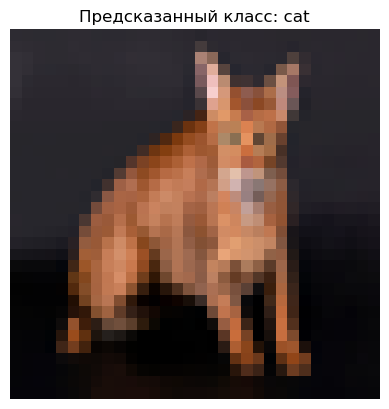

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


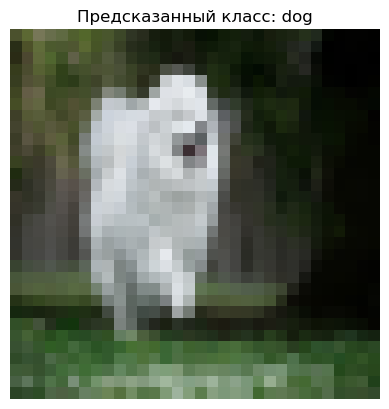

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


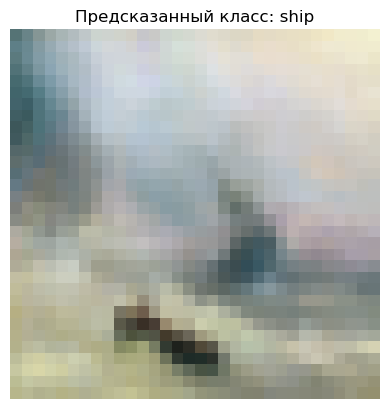

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


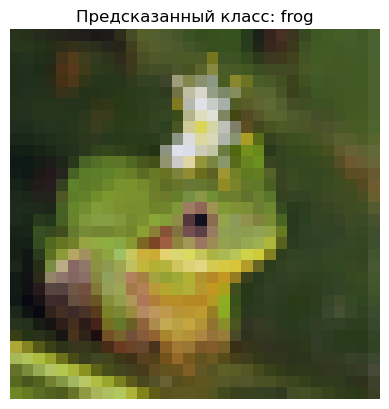

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


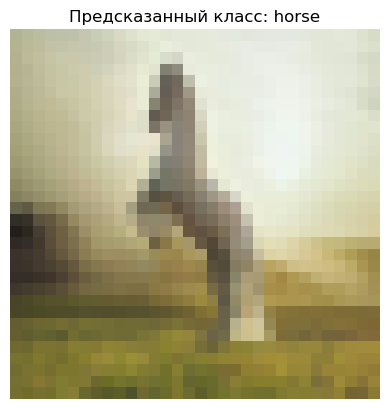

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


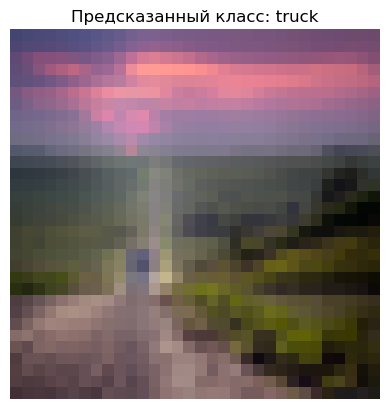

In [115]:
img_names = ['images/cat.jpeg', 'images/dog.jpeg', 'images/ship.jpeg', 'images/frog.jpeg', 'images/horse.jpeg', 'images/грузовик.jpeg']
for img in img_names:
    predicton(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


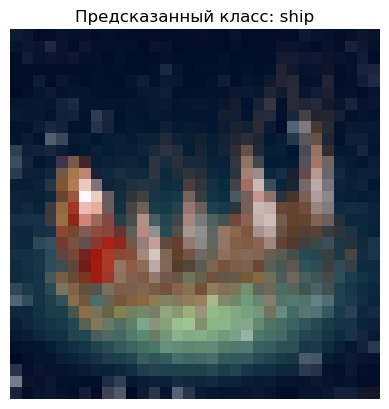

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


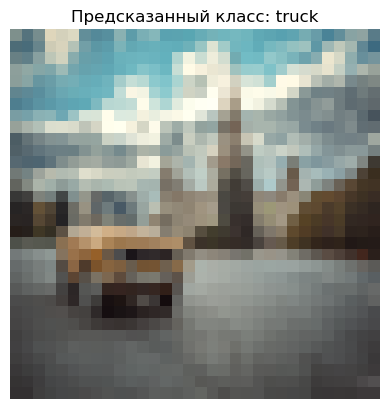

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


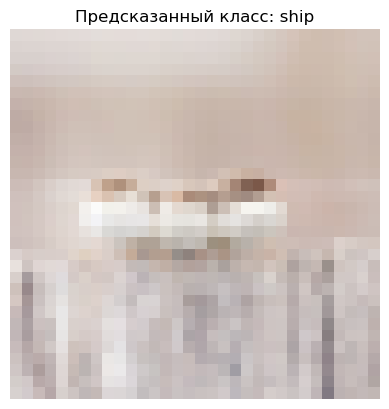

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


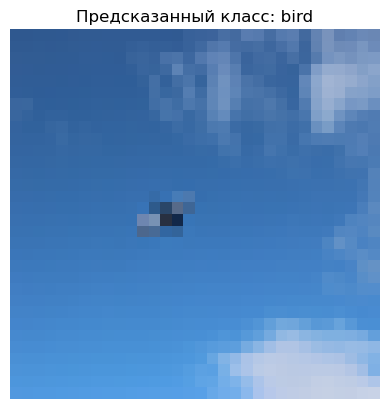

In [116]:
img_names = ['images/deer.jpeg', 'images/car.jpeg', 'images/bird.jpeg', 'images/plane.jpeg']
for img in img_names:
    predicton(img)